In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df = pd.read_csv(r"GroupData.csv", header=0)
data = df.dropna()
print(data.shape)
print(list(data.columns))

def check_df(dataframe):
    # Analyze descriptive statistics
    print(f"""
        ##################### Shape #####################\n\n\t{dataframe.shape}\n
        ##################### Types #####################\n\n{dataframe.dtypes}\n
        ##################### Head #####################\n\n{dataframe.head(173)}\n
        ##################### NA #####################\n\n{dataframe.isnull().sum()}\n
        ##################### Quantiles #####################\n\n{dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
        \n""")


check_df(df)


data.head(173)


        
        
        

(171, 8)
['Theme', 'Price', 'Item Name', 'Item_Cat', 'Conversion Rate Quarterly', 'Profit Margin Percentage', 'Higher Than Average Price', 'After Inflation ']

        ##################### Shape #####################

	(171, 8)

        ##################### Types #####################

Theme                         object
Price                        float64
Item Name                     object
Item_Cat                      object
Conversion Rate Quarterly    float64
Profit Margin Percentage     float64
Higher Than Average Price    float64
After Inflation              float64
dtype: object

        ##################### Head #####################

         Theme  Price                                          Item Name  \
0      Cottage  10.68              Wall Decor Collage Kit Physical Print   
1      Cottage  15.00                           Garden Cottage Art Print   
2      Cottage  16.00                            China Teacup saucer lot   
3      Cottage  17.98  Flower Prints B

,Theme,Price,Item Name,Item_Cat,Conversion Rate Quarterly,Profit Margin Percentage,Higher Than Average Price,After Inflation
0,Cottage,10.68,Wall Decor Collage Kit Physical Print,Home,0.05,0.50,1.0,12.68
1,Cottage,15.00,Garden Cottage Art Print,Home,0.07,0.40,1.0,17.00
2,Cottage,16.00,China Teacup saucer lot,Home,0.02,0.35,0.0,18.00
3,Cottage,17.98,Flower Prints Botanical Wall Art Set of 6 Flow...,Home,0.01,0.25,0.0,19.98
4,Cottage,17.98,Vintage Orchid Prints Set of 6 Flower Wall Art...,Home,0.01,0.55,0.0,19.98
...,...,...,...,...,...,...,...,...
166,CleanCore,39.00,Crewneck Hawaii Sweatshirt Preppy Sweatshirt C...,Clothing,0.01,0.47,0.0,41.00
167,CleanCore,54.00,High Hopes Pant,Clothing,0.03,0.42,0.0,56.00
168,CleanCore,54.90,Aesthetic Soft Girl French Mini Dress Blue SCo...,Clothing,0.02,0.35,0.0,56.90
169,CleanCore,56.00,Feels Like Sunday PantSHOPLUNAB,Clothing,0.02,0.42,1.0,58.00


In [35]:
data['Theme'].unique()

array(['Cottage', 'Y2K', 'OldMoney', 'Maximalism', 'TumblerCore',
       'Minimalism', 'CleanCore'], dtype=object)

In [40]:
data['Item_Cat'].value_counts()
    

35.00    8
25.00    6
39.00    4
15.00    3
29.00    3
        ..
15.45    1
14.00    1
13.99    1
11.90    1
54.90    1
Name: Price, Length: 127, dtype: int64

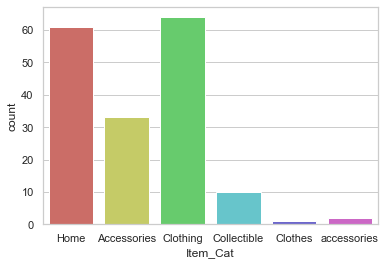

<Figure size 432x288 with 0 Axes>

In [42]:
sns.countplot(x='Item_Cat', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [92]:
count_Home = len(data[data['Item_Cat']=='Home'])
count_Accessories= len(data[data['Item_Cat']=='Accessories'])
count_Clothing=len(data[data['Item_Cat']=='Clothing'])
count_Collectible=len(data[data['Item_Cat']=='Collectible'])
count_Clothes=len(data[data['Item_Cat']=='Clothes'])
count_accessories=len(data[data['Item_Cat']=='accessories'])

pct_of_Home = count_Home/(count_Home+count_Accessories+count_Clothing+count_Collectible+count_Clothes+count_accessories)
print("percentage of Home ", pct_of_Home*100)
pct_of_Accessories = count_Accessories/(count_Home+count_Accessories+count_Clothing+count_Collectible+count_Clothes+count_accessories)
print("percentage of Accessories", pct_of_Accessories*100)
pct_of_Clothing = count_Clothing/(count_Home+count_Accessories+count_Clothing+count_Collectible+count_Clothes+count_accessories)
print('Percentage of Clothing', pct_of_Clothing*100)
pct_of_Collectible = count_Collectible/(count_Home+count_Accessories+count_Clothing+count_Collectible+count_Clothes+count_accessories)
print('Percentage of Collectible', pct_of_Collectible*100)

percentage of Home  35.67251461988304
percentage of Accessories 19.298245614035086
Percentage of Clothing 37.42690058479532
Percentage of Collectible 5.847953216374268


In [47]:
data.groupby('Item_Cat').mean()

,Price,Conversion Rate Quarterly,Profit Margin Percentage,Higher Than Average Price,After Inflation,Theme_CleanCore,Theme_Cottage,Theme_Maximalism,Theme_Minimalism,Theme_OldMoney,...,Profit Margin Percentage_0.92,Profit Margin Percentage_1.3,Profit Margin Percentage_1.5,Profit Margin Percentage_2.3,Profit Margin Percentage_2.4,Profit Margin Percentage_4.3,Higher Than Average Price_0.0,Higher Than Average Price_1.0,Theme_CleanCore_0,Theme_CleanCore_1
Item_Cat,,,,,,,,,,,,,,,,,,,,,
Accessories,33.181212,0.020303,0.458485,0.424242,35.181212,0.272727,0.121212,0.000000,0.303030,0.181818,...,0.0,0.030303,0.0,0.0,0.0,0.0,0.575758,0.424242,0.727273,0.272727
Clothes,11.900000,0.030000,0.490000,0.000000,13.900000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000
Clothing,89.617969,0.030781,0.525000,0.562500,91.617969,0.187500,0.078125,0.000000,0.078125,0.140625,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.437500,0.562500,0.812500,0.187500
Collectible,41.104000,0.016000,1.460000,0.300000,43.104000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.1,0.000000,0.1,0.1,0.1,0.1,0.700000,0.300000,1.000000,0.000000
Home,52.412131,0.020164,0.405902,0.557377,54.412131,0.098361,0.262295,0.393443,0.114754,0.032787,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.442623,0.557377,0.901639,0.098361
accessories,2287.500000,0.010000,0.665000,1.000000,2289.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.000000


In [90]:
data.groupby('Theme').mean()

,Price,Conversion Rate Quarterly,Profit Margin Percentage,Higher Than Average Price,After Inflation,Theme_CleanCore,Theme_Cottage,Theme_Maximalism,Theme_Minimalism,Theme_OldMoney,...,Profit Margin Percentage_0.92,Profit Margin Percentage_1.3,Profit Margin Percentage_1.5,Profit Margin Percentage_2.3,Profit Margin Percentage_2.4,Profit Margin Percentage_4.3,Higher Than Average Price_0.0,Higher Than Average Price_1.0,Theme_CleanCore_0,Theme_CleanCore_1
Theme,,,,,,,,,,,,,,,,,,,,,
CleanCore,27.901852,0.021481,0.390370,0.111111,29.901852,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888889,0.111111,0.0,1.0
Cottage,46.928000,0.024800,0.488800,0.520000,48.928000,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.480000,0.520000,1.0,0.0
Maximalism,97.787917,0.019167,0.465000,0.750000,99.787917,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,1.0,0.0
Minimalism,31.191364,0.024545,0.438182,0.500000,33.191364,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.0,0.0
OldMoney,282.192667,0.018667,0.793333,0.566667,284.192667,0.0,0.0,0.0,0.0,1.0,...,0.033333,0.000000,0.033333,0.033333,0.033333,0.033333,0.433333,0.566667,1.0,0.0
TumblerCore,32.544500,0.024500,0.377500,0.750000,34.544500,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,1.0,0.0
Y2K,41.272609,0.036087,0.652174,0.521739,43.272609,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478261,0.521739,1.0,0.0


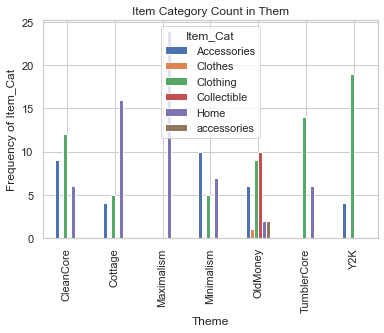

In [52]:
%matplotlib inline
pd.crosstab(data.Theme,data.Item_Cat).plot(kind='bar')
plt.title('Item Category Count in Them')
plt.xlabel('Theme')
plt.ylabel('Frequency of Item_Cat')
plt.savefig('Items')

In [ ]:
import inquirer
questions = [inquirer.List('Theme', message="What theme are you trying to have for your business", choices=['CottageCore', 'CleanCore', 'MinimalismCore', 'MaximalismCore', 'OldMoneyCore', 'TumblrCore', 'Y2KCore'], ),]
answer = inquirer.prompt(questions)
if answer =='CottageCore':
    print(df.mean('Price'))




[?] What theme are you trying to have for your business: CottageCore
 > CottageCore
   CleanCore
   MinimalismCore
   MaximalismCore
   OldMoneyCore
   TumblrCore
   Y2KCore
